In [339]:
import re
import os
import time
import random
import requests
import numpy as np
import pandas as pd
from os import system
from math import floor
from copy import deepcopy
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from imblearn.over_sampling import SMOTE
import gr_config
from rake_nltk import Rake

import time
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD


In [643]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [427]:
df = pd.read_csv('goodreads_data.csv')
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('format',axis=1)
df.drop(index=1899,inplace=True)

In [428]:
df.ratings = df.ratings.apply(lambda x: float(x))
df.num_ratings = df.num_ratings.apply(lambda x: int(x.replace(' ratings','').replace(',','')))
df.pages.dropna(inplace=True)
df.pages = df.pages.apply(lambda x: int(x.replace(' pages','')))
df.dropna(inplace=True)
df.genre = df.genre.apply(lambda x: x.replace('{','').replace('}',''))

In [429]:
# for i in range(1,7):
#     df[f'genre{i}'] = df.genre.apply(lambda x: 'NA' if len(x) < i else x[i-1])
# df.drop('genre', axis=1, inplace=True)

In [430]:
# df.to_csv('cleaned_gr_data.csv')

In [457]:
df1 = pd.read_csv('goodread_data2.csv')
df1 = df1.drop(['Unnamed: 0','genre1','genre2','format'],axis=1)
df1.dropna(inplace=True)

In [459]:
df1.ratings = df1.ratings.apply(lambda x: float(x))
df1.num_ratings = df1.num_ratings.apply(lambda x: int(x.replace(' ratings','').replace(',','')))
df1.pages.dropna(inplace=True)
df1.pages = df1.pages.apply(lambda x: int(x.replace(' pages','')))
df1.genre = df1.genre.apply(lambda x: x.replace('{','').replace('}',''))

In [432]:
# df1.index = df1.id
# df1.drop('id',axis=1,inplace=True)

In [433]:
# df.index = df.id
# df.drop('id',axis=1,inplace=True)

In [434]:
df1.genre = df1.genre.apply(lambda x: x.replace('{','').replace('}',''))

In [435]:
df1.genre

0       'Young Adult', 'Fantasy', 'Fiction', 'Dystopia...
1       'Biography', 'World War II', 'Nonfiction', 'Wa...
2       'Young Adult', 'Steampunk', 'Romance', 'Fantas...
3       'Contemporary', 'Adult', 'Adult Fiction', 'Fic...
4       'Romance', 'Young Adult', 'Science Fiction', '...
                              ...                        
1994    'Mystery', 'Thriller', 'Mystery Thriller', 'Fi...
1995    'Environment', 'Politics', 'Science', 'Nonfict...
1996                     'Mystery', 'Fiction', 'Thriller'
1997    'Mystery', 'Horror', 'Thriller', 'Mystery Thri...
1998    'Mystery', 'Thriller', 'Mystery Thriller', 'Fi...
Name: genre, Length: 1999, dtype: object

In [496]:
dff = pd.concat([df,df1])
dff.reset_index(inplace=True)
dff.drop('index',axis=1,inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [497]:
dff.genre = dff.genre.apply(lambda x: x.replace("'",''))

# NLP Cleaning

In [15]:
# NLP imports
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

In [16]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
stopwords_list += ['book', 'author', 'novel', 'year', 'come', 'stories','story','thing']

In [31]:
nlp = dff[['description']]
nlp['describe_raw'] = nlp.description.apply(lambda info: nltk.regexp_tokenize(info, pattern));
nlp['describe_tokens'] = nlp.describe_raw.apply(lambda x: [word.lower() for word in x]);
nlp['words_stopped'] = nlp.describe_tokens.apply(lambda x : [word for word in x if word not in stopwords_list]);
nlp['freq_dist'] = nlp.words_stopped.apply(lambda x: FreqDist(x));
nlp['freq_dist_top'] = nlp.freq_dist.apply(lambda x: x.most_common(20));

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [32]:
nlp

description  \
id                                                            
5         Harry Potter's third year at Hogwarts is full ...   
47440429  Now in a special edition to mark the twentieth...   
35545737  There was a time when the world was sweeter......   
78411     Dear Reader,  I'm sorry to say that the book y...   
5439      Navigating between the Indian traditions they'...   
...                                                     ...   
41587116  From the bestselling author of The Marriage Li...   
41552709  It is worse, much worse, than you think. If yo...   
41632412  Former CIA operative turned mercenary for hire...   
40065317  A chilling ghost story with a twist: the New Y...   
40863437  The New York Times bestselling author of What ...   

                                               describe_raw  \
id                                                            
5         [Harry, Potter's, third, year, at, Hogwarts, i...   
47440429  [Now, in, a, special, edition, to, mark, the, ...   
35545737  [There, was, a, time, when, the, world, was, s...   
78411     [Dear, Reader, I'm, sorry, to, say, that, the,...   
5439      [Navigating, between, the, Indian, traditions,...   
...                                                     ...   
41587116  [From, the, bestselling, author, of, The, Marr...   
41552709  [It, is, worse, much, worse, than, you, think,...   
41632412  [Former, CIA, operative, turned, mercenary, fo...   
40065317  [A, chilling, ghost, story, with, a, twist, th...   
40863437  [The, New, York, Times, bestselling, author, o...   

                                            describe_tokens  \
id                                                            
5         [harry, potter's, third, year, at, hogwarts, i...   
47440429  [now, in, a, special, edition, to, mark, the, ...   
35545737  [there, was, a, time, when, the, world, was, s...   
78411     [dear, reader, i'm, sorry, to, say, that, the,...   
5439      [navigating, between, the, indian, traditions,...   
...                                                     ...   
41587116  [from, the, bestselling, author, of, the, marr...   
41552709  [it, is, worse, much, worse, than, you, think,...   
41632412  [former, cia, operative, turned, mercenary, fo...   
40065317  [a, chilling, ghost, story, with, a, twist, th...   
40863437  [the, new, york, times, bestselling, author, o...   

                                              words_stopped  \
id                                                            
5         [harry, potter's, third, hogwarts, full, new, ...   
47440429  [special, edition, mark, twentieth, anniversar...   
35545737  [time, world, sweeter, women, beaufort, north,...   
78411     [dear, reader, i'm, sorry, say, holding, hands...   
5439      [navigating, indian, traditions, they've, inhe...   
...                                                     ...   
41587116  [bestselling, marriage, lie, three, days, miss...   
41552709  [worse, much, worse, think, anxiety, global, w...   
41632412  [former, cia, operative, turned, mercenary, hi...   
40065317  [chilling, ghost, twist, new, york, times, bes...   
40863437  [new, york, times, bestselling, knew, conjures...   

                                                  freq_dist  \
id                                                            
5         {'harry': 4, 'potter's': 1, 'third': 2, 'hogwa...   
47440429  {'special': 1, 'edition': 1, 'mark': 1, 'twent...   
35545737  {'time': 1, 'world': 2, 'sweeter': 1, 'women':...   
78411     {'dear': 1, 'reader': 1, 'i'm': 1, 'sorry': 1,...   
5439      {'navigating': 1, 'indian': 2, 'traditions': 1...   
...                                                     ...   
41587116  {'bestselling': 1, 'marriage': 1, 'lie': 1, 't...   
41552709  {'worse': 2, 'much': 1, 'think': 1, 'anxiety':...   
41632412  {'former': 1, 'cia': 1, 'operative': 1, 'turne...   
40065317  {'chilling': 1, 'ghost': 1, 'twist': 1, 'new':...   
40863437  {'

In [33]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [502]:
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in stopwords_list and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [35]:
nlp['prepro_des'] = nlp.description.apply(lambda x: preprocess(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
preprocess_des = nlp['prepro_des']

In [38]:
dictionary = gensim.corpora.Dictionary(preprocess_des)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 ach
1 adventur
2 art
3 await
4 azkaban
5 belov
6 best
7 black
8 break
9 broom
10 catch


In [39]:
dictionary.filter_extremes(no_below=20, no_above=0.66, keep_n=10000)


In [40]:
len(dictionary)

2466

In [41]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocess_des]
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 5),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 2),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 2),
 (65, 1)]

In [42]:
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]], 
bow_doc_0[i][1]))

Word 0 ("ach") appears 1 time.
Word 1 ("adventur") appears 1 time.
Word 2 ("art") appears 1 time.
Word 3 ("await") appears 1 time.
Word 4 ("belov") appears 1 time.
Word 5 ("best") appears 1 time.
Word 6 ("black") appears 2 time.
Word 7 ("break") appears 1 time.
Word 8 ("catch") appears 1 time.
Word 9 ("childhood") appears 1 time.
Word 10 ("close") appears 1 time.
Word 11 ("closer") appears 1 time.
Word 12 ("continu") appears 1 time.
Word 13 ("convict") appears 1 time.
Word 14 ("cute") appears 1 time.
Word 15 ("danger") appears 1 time.
Word 16 ("dark") appears 1 time.
Word 17 ("defens") appears 1 time.
Word 18 ("despair") appears 1 time.
Word 19 ("despit") appears 1 time.
Word 20 ("educ") appears 1 time.
Word 21 ("effort") appears 1 time.
Word 22 ("evil") appears 1 time.
Word 23 ("father") appears 1 time.
Word 24 ("fourth") appears 1 time.
Word 25 ("friend") appears 1 time.
Word 26 ("frighten") appears 1 time.
Word 27 ("funni") appears 1 time.
Word 28 ("grow") appears 1 time.
Word 29 ("

## TF-IDF

In [43]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.13788066590059778),
 (1, 0.08034643660007196),
 (2, 0.13367712067073523),
 (3, 0.11053581387639434),
 (4, 0.08874767722265887),
 (5, 0.055784638422334484),
 (6, 0.1690093548013667),
 (7, 0.06706086861736571),
 (8, 0.08533154266578252),
 (9, 0.09227671801495374),
 (10, 0.07842257270608229),
 (11, 0.10279359967581424),
 (12, 0.09451191280578862),
 (13, 0.12176311213171508),
 (14, 0.13975545328988404),
 (15, 0.05739431700795589),
 (16, 0.05755005919171883),
 (17, 0.1274042447681287),
 (18, 0.1255899770841674),
 (19, 0.0965207237732077),
 (20, 0.12075902710070109),
 (21, 0.11579859097274402),
 (22, 0.08561265893109299),
 (23, 0.0608025998298012),
 (24, 0.1361231316208895),
 (25, 0.046325935392080554),
 (26, 0.12075902710070109),
 (27, 0.0941268192184464),
 (28, 0.0669152134092989),
 (29, 0.10610464479342294),
 (30, 0.5411650475670166),
 (31, 0.1267863870997809),
 (32, 0.06415019597617896),
 (33, 0.09122241724252456),
 (34, 0.07217158189003528),
 (35, 0.12333986513072936),
 (36, 0.05

In [44]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=dictionary, passes=4, workers=2)

In [45]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.014*"life" + 0.011*"famili" + 0.009*"world" + 0.008*"live" + 0.008*"love" + 0.006*"father" + 0.006*"secret" + 0.006*"death" + 0.006*"citi" + 0.005*"young"
Topic: 1 
Words: 0.019*"power" + 0.013*"time" + 0.011*"faeri" + 0.011*"enemi" + 0.009*"king" + 0.009*"life" + 0.009*"children" + 0.008*"york" + 0.008*"blood" + 0.007*"fight"
Topic: 2 
Words: 0.018*"friend" + 0.015*"life" + 0.014*"love" + 0.012*"time" + 0.012*"york" + 0.011*"bestsel" + 0.010*"secret" + 0.009*"dead" + 0.009*"come" + 0.009*"town"
Topic: 3 
Words: 0.013*"life" + 0.011*"time" + 0.011*"year" + 0.010*"live" + 0.008*"love" + 0.008*"famili" + 0.008*"marriag" + 0.007*"write" + 0.007*"world" + 0.006*"women"
Topic: 4 
Words: 0.020*"world" + 0.016*"life" + 0.012*"love" + 0.010*"magic" + 0.010*"want" + 0.008*"live" + 0.007*"find" + 0.007*"good" + 0.006*"power" + 0.006*"take"
Topic: 5 
Words: 0.011*"work" + 0.010*"friend" + 0.010*"stephani" + 0.010*"life" + 0.009*"leav" + 0.008*"need" + 0.008*"hous" + 0.007*"fami

In [55]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.2MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=80864848ed756d172ef5b802e3ab5b4e4f5c050fb913a5bab9483e2e712baad0
  Stored in directory: /Users/quannguyen/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [56]:
# dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
# corpus = pickle.load(open('corpus.pkl', 'rb'))
# lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [46]:
#tfidf
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.003*"love" + 0.003*"life" + 0.003*"live" + 0.003*"world" + 0.003*"know" + 0.003*"time" + 0.002*"famili" + 0.002*"home" + 0.002*"want" + 0.002*"question"
Topic: 1 Word: 0.003*"world" + 0.003*"live" + 0.003*"love" + 0.003*"human" + 0.003*"know" + 0.003*"dead" + 0.002*"time" + 0.002*"life" + 0.002*"like" + 0.002*"famili"
Topic: 2 Word: 0.003*"love" + 0.003*"know" + 0.003*"need" + 0.003*"life" + 0.003*"friend" + 0.002*"live" + 0.002*"want" + 0.002*"world" + 0.002*"time" + 0.002*"famili"
Topic: 3 Word: 0.003*"vampir" + 0.003*"stephani" + 0.003*"love" + 0.003*"life" + 0.003*"famili" + 0.002*"friend" + 0.002*"world" + 0.002*"live" + 0.002*"secret" + 0.002*"time"
Topic: 4 Word: 0.003*"time" + 0.003*"world" + 0.003*"famili" + 0.003*"love" + 0.003*"life" + 0.002*"summer" + 0.002*"peopl" + 0.002*"know" + 0.002*"take" + 0.002*"live"
Topic: 5 Word: 0.003*"love" + 0.003*"world" + 0.003*"live" + 0.003*"famili" + 0.003*"witch" + 0.002*"life" + 0.002*"go" + 0.002*"jesus" + 0.002*"bests

In [50]:
for index, score in sorted(lda_model_tfidf[bow_corpus[1000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.38506805896759033	 
Topic: 0.004*"world" + 0.003*"love" + 0.003*"life" + 0.002*"know" + 0.002*"famili" + 0.002*"secret" + 0.002*"mother" + 0.002*"time" + 0.002*"think" + 0.002*"girl"

Score: 0.28606128692626953	 
Topic: 0.003*"time" + 0.003*"world" + 0.003*"famili" + 0.003*"love" + 0.003*"life" + 0.002*"summer" + 0.002*"peopl" + 0.002*"know" + 0.002*"take" + 0.002*"live"

Score: 0.26111871004104614	 
Topic: 0.003*"girl" + 0.003*"famili" + 0.003*"school" + 0.003*"live" + 0.003*"life" + 0.003*"love" + 0.003*"friend" + 0.003*"know" + 0.002*"chang" + 0.002*"world"

Score: 0.057490620762109756	 
Topic: 0.003*"secret" + 0.003*"world" + 0.003*"love" + 0.003*"power" + 0.003*"time" + 0.002*"life" + 0.002*"friend" + 0.002*"young" + 0.002*"best" + 0.002*"know"


# EDA


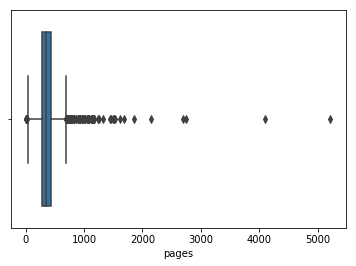

In [137]:
sns.boxplot(df.pages)

In [138]:
df.pages.describe()

count   2193.000
mean     383.809
std      234.076
min        4.000
25%      275.000
50%      353.000
75%      441.000
max     5216.000
Name: pages, dtype: float64

In [151]:
df.isna().sum()

titles         0
authors        0
ratings        0
num_ratings    0
id             0
description    0
pages          0
genre          0
dtype: int64

In [161]:
df.genre1.apply(lambda x: str(x))

0          'Middle Grade'
1               'Fiction'
2               'Romance'
3           'Young Adult'
4         'Short Stories'
              ...        
2194       'Contemporary'
2195            'Fantasy'
2196               'BDSM'
2197    'Science Fiction'
2198      'Urban Fantasy'
Name: genre1, Length: 2193, dtype: object

In [166]:
df.genre1.value_counts()

'Fantasy'               247
'Historical Fiction'    229
'Mystery'               150
'Urban Fantasy'         132
'Fiction'               132
                       ... 
'Time Travel'             1
'Storytime'               1
'Read For School'         1
'Adult Fiction'           1
'Egypt'                   1
Name: genre1, Length: 123, dtype: int64

# Recommender System

In [363]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(dff['description'])
tfidf_matrix.shape

(4192, 342517)

In [1098]:
tfidf_matrix

<4192x342517 sparse matrix of type '<class 'numpy.float64'>'
	with 678784 stored elements in Compressed Sparse Row format>

In [364]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[0]

array([1.        , 0.01508129, 0.00822817, ..., 0.00582315, 0.00648496,
       0.00480784])

In [1094]:
indices_1

titles
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)       0
The Perks of Being a Wallflower                                   1
A Walk to Remember                                                2
The Bad Beginning (A Series of Unfortunate Events, #1)            3
Interpreter of Maladies                                           4
                                                               ... 
Dear Wife                                                      4178
The Uninhabitable Earth: Life After Warming                    4179
The Rescue (Ryan Decker #1)                                    4180
The Invited                                                    4181
The Nanny                                                      4182
Length: 4183, dtype: int64

In [1095]:
titles

0       Harry Potter and the Prisoner of Azkaban (Harr...
1                         The Perks of Being a Wallflower
2                                      A Walk to Remember
3       The Bad Beginning (A Series of Unfortunate Eve...
4                                 Interpreter of Maladies
                              ...                        
4178                                            Dear Wife
4179          The Uninhabitable Earth: Life After Warming
4180                          The Rescue (Ryan Decker #1)
4181                                          The Invited
4182                                            The Nanny
Name: titles, Length: 4183, dtype: object

In [1099]:
dff

authors                                        description  \
0              jkrowling  Harry Potters third year at Hogwarts is full o...   
1         stephenchbosky  Now in a special edition to mark the twentieth...   
2         nicholassparks  There was a time when the world was sweeterwhe...   
3          lemonysnicket  Dear Reader  Im sorry to say that the book you...   
4           jhumpalahiri  Navigating between the Indian traditions theyv...   
...                  ...                                                ...   
4178       kimberlybelle  From the bestselling author of The Marriage Li...   
4179  davidwallace-wells  It is worse much worse than you think If your ...   
4180       stevenkonkoly  Former CIA operative turned mercenary for hire...   
4181     jennifermcmahon  A chilling ghost story with a twist the New Yo...   
4182      gillymacmillan  The New York Times bestselling author of What ...   

                                                  genre        id  \
0     [middlegrade, adventure, fantasy, audiobook, c...         5   
1                   [fiction, contemporary, youngadult]  47440429   
2     [romance, chicklit, contemporary, fiction, you...  35545737   
3             [youngadult, childrens, fantasy, fiction]     78411   
4              [shortstories, cultural, fiction, india]      5439   
...                                                 ...       ...   
4178  [mystery, thriller, mysterythriller, fiction, ...  41587116   
4179  [environment, politics, science, nonfiction, n...  41552709   
4180                       [mystery, fiction, thriller]  41632412   
4181  [mystery, horror, thriller, mysterythriller, f...  40065317   
4182  [mystery, thriller, mysterythriller, fiction, ...  40863437   

      num_ratings   pages  ratings  \
0         2435849 435.000    4.560   
1         1138861 224.000    4.200   
2          617830 215.000    4.170   
3          357436 176.000    3.930   
4          149557 198.000    4.140   
...           ...     ...      ...   
4178         9115 384.000    4.080   
4179         6840 310.000    4.190   
4180        11965 390.000    4.150   
4181         6963 353.000    3.810   
4182         3991 400.000    3.780   

                                                 titles  \
0     Harry Potter and the Prisoner of Azkaban (Harr...   
1                       The Perks of Being a Wallflower   
2                                    A Walk to Remember   
3     The Bad Beginning (A Series of Unfortunate Eve...   
4                               Interpreter of Maladies   
...                                                 ...   
4178                                          Dear Wife   
4179        The Uninhabitable Earth: Life After Warming   
4180                        The Rescue (Ryan Decker #1)   
4181                                        The Invited   
4182                                          The Nanny   

                                              Key_words  \
0     [quidditch, aching, loneliness, eye, best, eff...   
1     [charts, major, motion, picture, starring, log...   
2     [life, forever, every, april, sea, partner, be...   
3     [baudelaire, siblings, lead, lives, filled, re...   
4     [young, indianamerican, couple, faces, india, ...   
...                                                 ...   
4178  [run, survival, must, decide, missing, marriag...   
4179  [warming, history, inconvenient, truth, earth,...   
4180  [ruined, decker, ’, highlevel, sedition, disas...   
4181  [teaching, jobs, dreams, charming, property, w...   
4182  [unexpected, visitor, knocks, jo, ’, memory, m...   

                                           bag_of_words  
0     jkrowling middlegrade adventure fantasy audiob...  
1     stephenchbosky fiction contemporary youngadult...  
2     nicholassparks romance chicklit contemporary f...  
3     lemonysnicket youngadult childrens fantasy fic...  
4     jhumpalahiri shortstories cultural fiction ind...  
...             

In [614]:
dff.reset_index(inplace=True)
titles = dff['titles']
indices_1 = pd.Series(dff.index, index=dff['titles'])

In [1089]:
indices_1['Gone Girl']

2593

In [617]:
 def get_recommendations(title):
    idx = indices_1[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [1091]:
get_recommendations('Bossypants')

2407                  Is Everyone Hanging Out Without Me?
3327                                  My Life on the Road
1091                                     Truth and Beauty
2628                   Brain on Fire: My Month of Madness
2602    Wild: From Lost to Found on the Pacific Crest ...
947     Sickened: The Memoir of a Munchausen by Proxy ...
1866                                     Wishful Drinking
2256                                                 Life
212     Kitchen Confidential: Adventures in the Culina...
1966                Tweak: Growing Up On Methamphetamines
2452                             Seriously... I'm Kidding
1634                     Born Standing Up: A Comic's Life
856                                                   Dry
2563                                        If You Ask Me
1884                                              Zeitoun
3471                                             Lab Girl
3221    Furiously Happy: A Funny Book About Horrible T...
3290          

# Description-based Recommender

In [564]:
dff.authors = dff.authors.apply(lambda x: x.split(' '))
dff.authors = dff.authors.apply(lambda x: ''.join(x).lower().replace('.',''))

In [463]:
# dff.genre = dff.genre.apply(lambda x: ''.join(x.split(',')).lower())

In [558]:
dff.genre = dff.genre.apply(lambda x: x.replace(' ','').lower().split(','))

In [544]:
import string
for c in string.punctuation:
    dff.description = dff.description.apply(lambda x: x.replace(c,""))
    
for s in string.digits:
    dff.description = dff.description.apply(lambda x: x.replace(s,""))
    
dff.description = dff.description.apply(lambda x: x.replace('”',''))
dff.description = dff.description.apply(lambda x: x.replace('“',''))

In [1]:
dff

NameError: name 'dff' is not defined

In [545]:
dff['Key_words'] = ''

for index, row in dff.iterrows():
    plot = row['description']
    
    # instantiating Rake, by default is uses english stopwords from NLTK
    # and discard all puntuation characters
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)

    # getting the dictionary with key words and their scores
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column
    dff['Key_words'][index] = list(key_words_dict_scores.keys())
    

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x1744841e0>, {'quidditch': 1, 'aching': 2, 'loneliness': 2, 'eye': 1, 'best': 2, 'efforts': 2, 'learned': 2, 'anything': 2, 'becomes': 2, 'close': 2, 'azkaban': 4, 'prison': 2, 'broken': 1, 'guards': 2, 'boy': 2, 'wizard': 2, 'frightening': 1, 'dark': 3, 'arts': 3, 'teacher': 3, 'harry': 8, 'sport': 1, 'things': 1, 'new': 6, 'defense': 2, 'often': 1, 'beloved': 3, 'series': 3, 'scholasticcom': 3, 'hunting': 2, 'sirius': 12, 'black': 9, 'grows': 5, 'ever': 5, 'closer': 5, 'funny': 1, 'evil': 4, 'lord': 4, 'voldemort': 4, 'could': 4, 'dangers': 2, 'patrolled': 1, 'life': 5, 'wizardry': 1, 'education': 1, 'potters': 4, 'third': 7, 'year': 4, 'terrible': 2, 'power': 2, 'despair': 4, 'meanwhile': 4, 'continues': 4, 'fill': 2, 'anyone': 2, 'seem': 5, 'tragic': 5, 'revelations': 5, 'heartwarming': 5, 'surprises': 5, 'full': 1, 'cant': 3, 'imagine': 3, 'cute': 4, 'fourthyear': 4, 'student': 4, 'catches': 4, 'convic

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x1882d82f0>, {'mouse': 5, 'walk': 1, 'real': 2, 'gr': 2, 'imagine': 1, 'gruffalo': 1, 'meets': 1, 'dangerous': 2, 'forest': 2, 'fantastical': 3, 'creature': 3, 'called': 3, 'surprise': 1, 'invents': 2, 'tales': 2, 'scare': 1, 'enemies': 1, 'monster': 4, 'little': 4, 'goes': 4, 'rhyming': 2, 'story': 2})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x1896a7840>, {'children': 5, 'human': 5, 'connection': 5, 'enduring': 5, 'commitment': 5, 'startlingly': 3, 'accomplished': 3, 'mixture': 3, 'pearl': 8, 'marks': 2, 'extraordinary': 6, 'literary': 6, 'talent': 6, 'oprahs': 6, 'book': 6, 'club': 6, 'late': 1, 'precious': 4, 'things': 4, 'neither': 4, 'experienced': 4, 'grew': 1, 'passionately': 2, 'determined': 2, 'town': 2, 'whore': 2, 'fifteenyearold': 3, 'white': 3, 'daughter': 3, 'orphan': 1, 'discover': 1, 'unconditional': 2, 'love': 2, 'debut': 1, 'racial': 2, 'ambivalence':

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x189fc8a60>, {'norway': 2, '’': 6, 'fabulous': 2, 'introduction': 2, 'betrayal': 1, 'design': 3, '—': 6, 'winner': 3, 'modernday': 4, 'oslo': 12, 'follow': 4, 'hole': 12, 'delve': 1, 'brilliant': 1, 'world': 3, 'war': 3, 'two': 3, 'scandinavian': 4, 'thriller': 4, 'writer': 4, '…': 4, 'better': 3, 'nesbø': 7, 'ranges': 1, 'ticking': 2, 'timebomb': 2, 'toughasnails': 8, 'series': 8, 'protagonist': 8, 'police': 8, 'detective': 8, 'harry': 8, 'selected': 1, 'stop': 1, 'redbreast': 1, 'murder': 1, 'also': 3, 'take': 3, 'note': 3, 'best': 10, 'norwegian': 6, 'crime': 10, 'novel': 13, 'ever': 6, 'written': 6, 'disarm': 1, 'races': 1, 'battlefields': 1, 'members': 1, 'murderer': 2, 'killer': 1, 'scope': 1, 'streets': 1, 'dark': 3, 'twisted': 3, 'mind': 3, 'glass': 2, 'key': 2, 'nation': 2, 'nordic': 4, 'book': 3, 'clubs': 3, 'shadowy': 5, 'past': 5, 'vogue': 5, 'magazine': 5, 'says': 5, 'epic': 3, 'breathtaking': 

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a0492f0>, {'familiar': 2, 'comforts': 2, 'father': 1, 'magazine': 1, 'chestnutlined': 10, 'boulevards': 10, 'sidewalk': 10, 'cafés': 10, 'breathtaking': 10, 'façades': 10, 'around': 10, 'every': 10, 'cornerin': 10, 'short': 10, 'singular': 2, 'wit': 2, 'city': 6, 'opportunity': 1, 'twentieth': 5, 'century': 5, 'paris': 7, 'dual': 2, 'processes': 2, 'gopnik': 13, 'describes': 2, 'insight': 3, 'weaves': 3, 'wife': 1, 'american': 9, 'abroad': 4, 'walked': 4, 'hassles': 1, 'daytoday': 4, 'notsofabled': 4, 'life': 6, 'evenings': 4, 'arrondissements': 1, 'gopniks': 2, 'beloved': 2, 'beautiful': 1, 'new': 28, 'yorker': 7, 'know': 5, 'also': 1, 'long': 1, 'ones': 1, 'trips': 1, 'matter': 1, 'light': 2, 'filled': 1, 'readers': 1, 'place': 1, 'eaten': 1, 'wholly': 5, 'delightful': 5, 'often': 5, 'hilarious': 5, 'look': 5, 'raise': 1, 'style': 1, 'decadesbut': 1, 'everyday': 2, 'grasp': 1, 'luxembourg': 2, 'gardens

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x1891d1f28>, {'esv': 7, 'bible': 11, 'kindle': 3, 'applications': 2, 'verse': 1, 'depth': 1, 'combines': 3, 'wordforword': 3, 'precision': 3, 'equipped': 1, 'meaning': 1, 'used': 1, 'literary': 3, 'excellence': 3, 'beauty': 3, 'navigate': 2, 'directly': 2, 'accuracy': 1, 'supported': 1, 'english': 5, 'standard': 5, 'version': 5, 'enhanced': 6, 'navigation': 6, 'feature': 13, 'kindles': 6, 'index': 6, 'essentially': 4, 'literal': 4, 'translation': 4})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x1891d1950>, {'desperate': 2, 'search': 2, 'needs': 2, 'help': 2, 'ambushed': 1, 'finds': 1, 'fbi': 12, 'investigates': 6, 'suspicion': 6, 'surrounding': 6, 'web': 15, 'deepens': 6, 'londons': 6, 'hostage': 6, 'rescue': 6, 'team': 6, 'began': 1, 'friends': 1, 'killer': 1, 'force': 2, 'intent': 2, 'finishing': 1, 'job': 1, 'survivor': 1, 'dark': 3, 'alley': 3, 'unlikely': 2, 'ally': 

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a180400>, {'earth': 1, 'personal': 4, 'fortyday': 4, 'spiritual': 7, 'journey': 4, 'corporate': 2, 'executives': 2, 'purpose': 6, 'driven': 3, 'life': 4, 'rick': 5, 'warren': 5, 'creating': 1, 'help': 1, 'important': 4, 'prepare': 2, 'transform': 1, 'discuss': 1, 'eternity': 6, 'movie': 3, 'stars': 3, 'reduce': 1, 'nba': 1, 'guide': 1, 'ones': 2, 'turning': 2, 'guidance': 3, 'millions': 3, 'prison': 4, 'inmates': 4, 'meet': 4, 'regularly': 4, 'new': 4, 'york': 4, 'times': 4, 'bestseller': 4, 'question': 2, 'political': 3, 'leaders': 3, 'arent': 3, 'alive': 1, 'knowing': 3, 'gods': 7, 'people': 1, 'decisions': 3, 'give': 3, 'meaning': 3, 'answer': 1, 'understand': 1, 'lpga': 2, 'players': 2, 'high': 3, 'school': 3, 'students': 3, 'energy': 2, 'simplify': 2, 'reveal': 4, 'amazing': 4, 'plan': 4, 'stress': 2, 'focus': 2, 'lifes': 1})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a2386a8>, {'irrepressible': 2, 'wit': 2, 'judy': 14, 'blume': 14, '’': 3, 'mischievous': 2, 'fudge': 10, 'laugh': 1, 'loud': 1, 'old': 1, 'favorite': 8, 'author': 12, 'bestselling': 8, 'whole': 3, 'new': 3, 'generation': 3, 'fourth': 8, 'grade': 8, 'nothing': 8, 'peter': 2, 'hatcher': 2, 'kid': 7, 'tales': 1, 'five': 6, 'books': 6, 'brandnew': 6, 'covers': 6, 'adorn': 6, 'wimpy': 4, 'series': 4, 'fans': 9, 'young': 5, '—': 12, 'knowitall': 3, 'sheila': 3, 'tubman': 3, 'perennial': 2, 'favorites': 2, 'unbreakable': 2, 'confidence': 2, 'book': 6, 'jeff': 6, 'kinney': 6, 'hilarious': 2, 'antics': 2, 'entice': 1})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a136158>, {'erics': 3, 'girlfriend': 3, 'shelly': 3, 'instance': 2, 'everyones': 2, 'youve': 1, 'rosemary': 4, 'cox': 4, 'whose': 4, 'marriage': 4, 'weve': 3, 'probably': 3, 'met': 3, 'olivia': 8, 'hometown': 1, 'wor

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x1882d8268>, {'novel': 3, 'franz': 2, 'kafka': 2, 'note': 1, 'see': 2})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a309f28>, {'slater': 2, 'offers': 2, 'kevin': 11, 'swerves': 2, 'runs': 1, 'sure': 1, 'deadly': 4, 'ultimatum': 2, 'blow': 3, 'sky': 3, 'high': 3, 'parking': 2, 'lot': 2, 'greatest': 4, 'enemy': 4, 'parson': 4, 'first': 2, 'move': 2, 'demand': 1, 'major': 5, 'motion': 5, 'picture': 5, 'event': 5, 'enter': 5, 'case': 5, 'precisely': 5, 'three': 8, 'minutes': 8, 'later': 5, 'good': 2, 'evil': 2, 'collision': 2, 'course': 2, 'thats': 1, 'closest': 3, 'friend': 3, 'could': 3, 'nothing': 1, 'else': 1, 'awardwinning': 4, 'bestselling': 8, 'suspense': 4, 'masterwork': 4, 'world': 3, 'refuse': 2, 'confess': 1, 'seems': 1, 'game': 2, 'powerful': 2, 'story': 2, 'fiction': 4, 'author': 4, 'comes': 4, 'massive': 3, 'explosion': 3, 'sets': 3, 'cell': 3, 'phone': 8, 'r

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a42c158>, {'remarkable': 5, 'book': 5, 'exploring': 5, 'critical': 5, 'junctures': 5, 'places': 1, 'poignant': 2, 'reflection': 2, 'manifest': 1, 'books': 3, 'side': 3, 'trips': 3, 'helped': 2, 'shape': 2, 'music': 7, 'bob': 13, 'dylan': 10, 'turns': 11, 'chronicles': 19, 'volume': 19, 'one': 19, 'possibilities': 8, 'smoky': 8, 'nightlong': 8, 'parties': 8, 'literary': 8, 'awakenings': 8, 'transient': 8, 'loves': 8, 'started': 1, 'dylans': 12, 'thoughts': 3, 'extraordinary': 2, 'times': 2, 'rhythmic': 2, 'utilizing': 2, 'man': 1, 'witty': 4, 'jabs': 1, 'new': 8, 'orleans': 4, 'woodstock': 4, 'minnesota': 4, 'eyes': 2, 'career': 1, 'destiny': 1, 'storytelling': 1, 'looking': 2, 'right': 2, 'unparalleled': 2, 'gifts': 2, 'memories': 2, 'penetrating': 2, 'life': 1, 'manhattan': 4, 'york': 4, 'nobody': 2, 'else': 2, 'hallmarks': 1, 'distinctively': 3, 'american': 3, 'generous': 3, 'punctuated': 1, 'people': 

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a238268>, {'beyond': 2, 'perfect': 8, 'somethings': 4, 'wrong': 14, 'something': 4, 'important': 4, 'fighting': 1, 'tally': 10, 'remembers': 4, 'whats': 4, 'knows': 1, 'tallys': 5, 'ugly': 5, 'past': 5, 'arrives': 5, 'reading': 5, 'authorities': 3, 'dont': 3, 'intend': 3, 'totally': 2, 'hot': 2, 'let': 2, 'anyone': 2, 'choose': 1, 'total': 2, 'freedom': 2, 'looks': 1, 'forget': 1, 'clothes': 1, 'life': 3, 'finally': 3, 'become': 3, 'pretty': 5, 'message': 1, 'beneath': 1, 'awesome': 1, 'nonstop': 2, 'parties': 2, 'shes': 7, 'completely': 3, 'popular': 9, 'gorgeous': 6, 'perfectly': 6, 'nagging': 2, 'sense': 2, 'fun': 4, 'boyfriend': 1, 'hightech': 2, 'luxury': 2, 'everything': 4, 'ever': 4, 'wanted': 4, 'information': 2, 'survive': 2, 'stops': 3, 'cold': 3})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x189655ae8>, {'dest': 1, 'humans': 1, 'beginning': 1, 'best': 2, 'fr

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a6ac400>, {'unseelie': 5, 'court': 6, 'infuses': 3, 'waited': 2, 'centuries': 3, 'enemies': 11, 'gather': 2, 'offer': 1, 'future': 1, 'magic': 2, 'come': 2, 'break': 1, 'lesser': 2, 'fey': 2, 'watch': 2, 'bloodshed': 1, 'sidhe': 3, 'pain': 2, 'await': 5, 'us': 11, '–': 10, 'faerie': 6, 'begins': 2, 'throne': 8, 'aunt': 3, 'andais': 3, 'queen': 5, 'peril': 1, 'dread': 1, 'nobles': 2, 'reawaken': 5, 'powers': 5, 'long': 5, 'forgotten': 5, 'among': 11, 'find': 6, 'new': 8, 'strength': 3, 'ever': 4, 'especially': 4, 'since': 4, 'fate': 4, 'butterflywinged': 2, 'demifey': 2, 'every': 2, 'move': 6, 'embrace': 1, 'real': 3, 'home': 3, 'heart': 3, 'passions': 3, 'undreamed': 3, 'give': 1, 'mistral': 2, 'master': 2, 'ruled': 1, 'also': 4, 'princess': 4, 'meredith': 9, 'heir': 4, 'lead': 1, 'warriors': 1, 'power': 1, 'allies': 1, 'popular': 2, 'human': 5, 'side': 4, 'comfort': 1, 'need': 1, 'captain': 2, 'become':

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a6451e0>, {'learn': 1, 'name': 1, 'circle': 3, 'powers': 2, 'come': 2, 'raging': 3, 'sea': 3, 'belting': 3, 'become': 2, 'note': 2, 'boundaries': 1, 'grief': 1, 'listening': 13, 'length': 13, 'hours': 13, 'minutes': 13, 'numberone': 13, 'new': 17, 'york': 13, 'times': 13, 'bestselling': 13, 'author': 13, 'nora': 13, 'roberts': 13, 'delivers': 13, 'morrigans': 2, 'charge': 2, 'ring': 1, 'passions': 1, 'storm': 5, 'hoyt': 6, 'mac': 5, 'cionaoith': 5, 'rails': 5, 'future': 1, 'story': 2, 'concludes': 2, 'witch': 1, 'match': 1, 'glossary': 1, 'dark': 2, 'siren': 2, 'lightning': 3, 'striking': 3, 'blue': 3, 'high': 5, 'cliff': 3, 'overlooking': 3, 'beyond': 1, 'form': 1, 'hundreds': 2, 'six': 1, 'years': 3, 'vengeance': 1, 'chance': 1, 'nothing': 1, 'stop': 1, 'heart': 2, '—': 10, 'men': 4, 'edition': 2, 'includes': 2, 'lured': 3, 'countless': 3, 'spirit': 2, 'breaks': 1, 'women': 2, 'caught': 2, 'thousand': 

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a238378>, {'runs': 1, 'survival': 2, 'depends': 2, 'bitter': 3, 'old': 3, 'man': 5, 'backbone': 1, 'thief': 3, 'hugo': 3, 'lives': 3, 'spellbinding': 2, 'mystery': 2, 'world': 3, 'suddenly': 3, 'interlocks': 3, 'intricate': 2, 'tender': 2, 'eccentric': 3, 'bookish': 3, 'girl': 3, 'busy': 4, 'paris': 4, 'train': 4, 'station': 8, 'put': 1, 'stolen': 2, 'key': 2, 'treasured': 2, 'notebook': 2, 'hugos': 8, 'dead': 4, 'father': 4, 'form': 4, 'cryptic': 2, 'drawing': 2, 'hidden': 2, 'message': 2, 'walls': 1, 'secrets': 1, 'mechanical': 2, 'precious': 2, 'secret': 2, 'toy': 2, 'booth': 2, 'orphan': 3, 'clock': 3, 'keeper': 3, 'undercover': 4, 'life': 4, 'jeopardy': 1, 'anonymity': 1})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a238048>, {'actually': 6, 'good': 6, 'vampires': 6, 'pretty': 6, 'soon': 6, 'bones': 7, '’': 3, 'amazed': 1, 'pursued': 1, 'sharp': 1, 'father': 5,

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a84d598>, {'law': 1, 'inimitable': 2, 'words': 2, 'astounding': 1, 'called': 1, 'wife': 1, 'made': 2, 'thousands': 2, 'wall': 2, 'street': 2, 'long': 2, 'island': 2, 'bodyguards': 1, 'notorious': 7, 'investment': 7, 'firm': 7, 'stratton': 15, 'oakmont': 15, 'became': 7, 'one': 11, 'belfort': 24, '’': 2, 'excess': 1, 'came': 2, 'crashing': 2, 'sec': 1, 'stock': 2, 'buys': 2, 'binge': 1, 'led': 1, 'greed': 2, 'power': 2, 'modelwife': 1, 'included': 4, 'two': 4, 'young': 8, 'children': 4, 'brilliant': 3, 'conniving': 3, 'stockchopper': 3, 'minute': 1, 'hypedup': 5, 'cokedout': 5, 'brokers': 5, 'browbeat': 5, 'clients': 5, 'earn': 4, 'obscene': 4, 'profits': 4, '—': 10, 'dollars': 1, 'extraordinary': 2, 'story': 3, 'massive': 2, 'office': 4, 'millions': 1, 'american': 2, 'finance': 2, 'breakout': 9, 'shoe': 9, 'designer': 9, 'named': 9, 'steve': 9, 'madden': 9, 'would': 9, 'land': 9, 'sixteen': 1, 'madcap': 

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a95f8c8>, {'dreams': 1, 'come': 2, 'true': 2, 'enemys': 3, 'dying': 3, 'wish': 3, 'child': 2, 'would': 4, 'junes': 4, 'elevenyearold': 4, 'daughter': 4, 'claire': 6, 'bitter': 4, 'regrets': 4, 'past': 4, 'crimes': 4, 'save': 1, 'miracle': 1, 'lost': 1, 'mothers': 3, 'tragic': 3, 'loss': 3, 'justice': 3, 'offer': 1, 'mother': 1, 'surprises': 1, 'give': 1, 'future': 1, 'one': 12, 'last': 7, 'chance': 7, 'years': 2, 'full': 2, 'love': 3, 'shay': 5, 'someone': 4, 'short': 2, 'waiting': 10, 'believe': 2, 'always': 2, 'happily': 3, 'looking': 3, 'forward': 3, 'hate': 1, 'wounds': 2, 'staring': 1, 'vengeance': 1, 'nothing': 1, 'happen': 1, 'time': 1, 'mans': 4, 'life': 5, 'heal': 1, 'stretches': 2, 'redemption': 2, 'others': 1, 'family': 1, 'world': 1, 'given': 1, 'story': 1, 'enthralls': 2, 'readers': 2, 'gaining': 2, 'salvationcan': 2, 'truth': 5, 'moment': 5, 'june': 5, 'nealon': 5, 'bourne': 4, 'holds': 4, 

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18aa6f9d8>, {'princess': 4, 'panchaalis': 4, 'life': 4, 'beginning': 4, 'dangerous': 3, 'enemy': 3, 'panchaali': 6, 'new': 2, 'interpretation': 2, 'point': 1, 'illusions': 4, 'takes': 4, 'us': 8, 'back': 4, 'wholly': 3, 'magical': 3, 'narrated': 3, 'novel': 5, 'traces': 2, 'complicated': 2, 'friendship': 2, 'view': 1, 'strategic': 2, 'duels': 2, 'warriors': 2, 'gods': 2, 'exile': 1, 'mahabharat': 4, '—': 3, 'told': 3, 'birth': 1, 'india': 2, 'meanwhile': 2, 'wife': 1, 'worldfamous': 3, 'indian': 3, 'epic': 3, 'years': 1, 'quest': 1, 'five': 2, 'husbands': 3, 'gives': 3, 'time': 1, 'amazing': 3, 'woman': 4, 'relevant': 3, 'terrible': 4, 'civil': 4, 'war': 4, 'involving': 4, 'side': 1, 'swept': 1, 'world': 3, 'following': 1, 'motherinlaw': 1, 'reimagining': 1, 'secret': 2, 'attraction': 2, 'wartorn': 2, 'important': 2, 'kings': 2, 'father': 2, '’': 4, 'half': 8, 'history': 4, 'myth': 4, 'today': 2, 'spirited

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18aad8158>, {'changingthe': 2, 'government': 4, 'hauled': 1, 'save': 1, 'suppress': 3, 'life': 9, 'liberty': 3, 'normal': 4, 'teenager': 4, 'imprisoned': 4, 'together': 4, 'new': 2, 'disappearing': 1, 'older': 6, 'brother': 6, 'whit': 11, 'turns': 6, 'upsidedown': 6, 'secret': 2, 'compound': 2, 'thrown': 1, 'singled': 1, 'skills': 1, 'clearly': 2, 'trying': 2, 'kids': 1, 'every': 2, 'aspect': 2, 'society': 1, 'reason': 1, 'condemned': 1, 'time': 1, 'comprehend': 1, 'parentsand': 2, 'maybe': 3, 'powers': 1, 'world': 1, 'never': 2, 'dreamed': 2, 'newly': 3, 'discovered': 3, 'witch': 3, 'pursuit': 1, 'bed': 4, 'one': 4, 'night': 4, 'separated': 4, 'begin': 5, 'exhibiting': 5, 'strange': 5, 'abilities': 5, 'death': 2, 'wisty': 4, 'seized': 2, 'control': 2, 'parents': 1, 'wizard': 2, 'master': 2, 'fifteenyearold': 2})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18aad87b8>, {

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18abe3730>, {'learn': 1, 'secret': 3, 'destiny': 3, 'one': 3, 'afar': 1, 'eyes': 1, 'meghan': 5, 'young': 2, 'prince': 2, 'change': 1, 'let': 1, 'dark': 4, 'stranger': 4, 'begins': 4, 'watching': 4, 'truth': 1, 'cares': 1, 'imagined': 2, 'something': 2, 'school': 1, 'always': 3, 'felt': 3, 'slightly': 3, 'deadly': 2, 'war': 2, 'six': 1, 'icy': 2, 'heart': 2, 'chase': 2, 'stop': 1, 'could': 2, 'never': 5, 'guessed': 1, 'daughter': 1, 'mythical': 3, 'faery': 7, 'king': 3, 'save': 2, 'someone': 2, 'touch': 1, 'father': 2, 'disappeared': 2, 'pawn': 1, 'meghans': 4, 'life': 4, 'ever': 4, 'since': 4, 'quite': 3, 'fit': 3, 'home': 1, 'senses': 2, 'creature': 4, 'dare': 4, 'face': 4, 'everything': 3, 'shes': 3, 'known': 3, 'prankster': 6, 'best': 6, 'friend': 6, 'becomes': 6, 'strangely': 6, 'protective': 6, 'find': 2, 'love': 2, 'dead': 1, 'far': 3, 'shell': 3, 'go': 3, 'might': 3, 'rather': 3, 'see': 3, 'mysteri

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18acca378>, {'dreams': 1, 'suburban': 5, 'new': 5, 'jersey': 5, 'family': 5, 'captain': 5, 'social': 3, 'worker': 3, 'known': 3, 'three': 6, 'months': 6, 'quickly': 6, 'pass': 6, 'without': 6, 'word': 6, 'latest': 4, 'target': 4, 'dan': 4, 'mercer': 4, 'sexual': 5, 'predators': 5, 'via': 5, 'elaborate': 5, '—': 11, 'mission': 1, 'find': 1, 'team': 4, 'friend': 1, 'doting': 2, 'parents': 2, 'identify': 1, 'imagined': 1, 'community': 2, 'assumes': 2, 'night': 1, 'good': 2, 'girl': 3, 'haley': 7, 'never': 4, 'came': 4, 'home': 4, 'men': 1, 'time': 1, 'story': 3, 'soon': 3, 'becomes': 3, 'worst': 3, 'wendy': 7, 'tynes': 3, 'reporter': 1, 'yearold': 3, 'mcwaid': 3, 'mother': 4, 'wakes': 4, 'one': 4, 'morning': 4, 'publicly': 3, 'shamed': 3, 'dozens': 3, 'news': 3, 'program': 3, 'caught': 3, 'encounters': 1, 'bring': 1, 'pride': 1, 'nationally': 6, 'televised': 6, 'sting': 6, 'operations': 6, 'working': 6, 'pin'

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18ad63598>, {'young': 3, 'doctor': 3, 'arrives': 3, 'sea': 1, 'age': 1, 'vagabond': 1, 'famed': 2, 'physician': 2, 'balkan': 3, 'country': 3, 'mending': 3, 'worn': 2, 'copy': 2, 'weaving': 1, 'conflict': 2, 'natalia': 14, 'stories': 4, 'told': 4, 'one': 7, 'encounters': 1, 'even': 1, 'must': 6, 'discover': 4, 'understand': 5, 'run': 5, 'like': 5, 'secret': 5, 'rivers': 5, 'appeared': 2, 'never': 5, 'also': 2, 'confronting': 2, 'generation': 1, 'childhood': 2, 'village': 2, 'searching': 1, 'meet': 2, 'find': 1, 'forty': 1, 'timeless': 2, 'novel': 2, 'orphanage': 1, 'known': 1, 'grandmother': 1, 'years': 3, 'second': 3, 'world': 3, 'war': 3, 'tell': 1, 'life': 1, 'extraordinary': 2, 'story': 2, 'ill': 1, 'spun': 1, 'inoculate': 1, 'children': 1, 'recent': 2, 'death': 2, 'haunted': 1, 'instead': 2, 'set': 2, 'chosen': 1, 'surrounding': 7, 'vineyards': 4, 'secrets': 11, 'hidden': 4, 'private': 3, 'hurtful': 3,

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18aeb98c8>, {'thick': 1, 'caroline': 10, 'moves': 2, 'like': 1, 'noise': 1, 'paperthin': 2, 'walls': 3, 'may': 1, 'intimate': 2, 'knowledge': 2, 'exasperation': 1, 'discovered': 1, 'heardbutneverseen': 2, 'neighbor': 3, 'results': 1, 'loud': 5, 'night': 7, 'goes': 3, 'mixed': 3, 'suddenly': 3, 'ecstatic': 2, 'response': 2, 'hear': 1, 'new': 13, 'neighbors': 5, 'nocturnal': 5, 'adventures': 5, 'thanks': 5, 'fantasies': 2, 'keep': 2, 'finds': 1, 'since': 2, 'hot': 1, 'clearly': 3, 'lethally': 3, 'attractive': 3, 'silly': 1, 'selfimposed': 3, 'dating': 3, 'hiatus': 3, 'steamy': 4, 'alice': 4, 'clayton': 4, 'dishes': 4, 'sexual': 2, 'frustration': 2, 'fantastic': 5, 'san': 5, 'francisco': 5, 'apartment': 5, 'literally': 2, 'bounce': 2, 'endless': 2, 'parade': 2, 'currently': 1, 'hilarious': 2, 'tale': 2, 'seems': 1, 'thin': 1, 'whole': 3, 'definition': 3, 'first': 4, 'sight': 2, 'women': 1, 'realizes': 3, 'she

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18b00eea0>, {'something': 1, 'place': 1, 'firearms': 1, 'followed': 2, 'changed': 2, 'outskirts': 1, 'intrigues': 5, 'police': 5, 'chief': 5, 'brooks': 5, 'gleason': 5, 'quirky': 3, 'unforgettable': 3, 'heroine': 3, 'leave': 6, 'people': 3, 'hungering': 3, 'ozarks': 1, 'allowing': 1, 'events': 1, 'security': 5, 'nightclub': 1, 'reliably': 3, 'entertaining': 3, 'thriller': 3, 'logical': 2, 'mind': 2, 'secretive': 2, 'nature': 2, 'fascinated': 1, 'freelance': 2, 'programmer': 2, 'house': 1, 'riveting': 3, 'new': 3, 'read': 3, 'daughter': 1, 'lake': 3, 'shore': 3, 'drive': 3, 'abigails': 2, 'reserve': 2, 'saying': 4, 'little': 4, 'revealing': 4, 'nothing': 4, 'woman': 2, 'known': 2, 'suspects': 1, 'elaborate': 3, 'defenses': 3, 'hide': 3, 'pulsepounding': 5, 'plotline': 5, 'nora': 5, 'roberts': 5, 'presents': 5, 'story': 1, 'designs': 4, 'sophisticated': 4, 'systems': 4, 'life': 5, 'forever': 5, 'twelve': 5, 

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18afb2598>, {'college': 8, 'real': 3, 'abandoned': 3, 'asylums': 3, 'sanatorium': 1, 'lifeline': 1, 'thrilling': 1, 'soon': 2, 'discover': 2, 'terrifying': 2, 'past': 2, 'criminally': 2, 'insane': 2, 'chilling': 2, 'mystery': 2, 'fans': 1, 'ended': 1, 'key': 1, 'peculiar': 2, 'children': 2, 'finally': 2, 'make': 2, 'high': 3, 'school': 3, 'dan': 14, 'horror': 2, 'story': 2, 'refuse': 1, 'insanity': 1, 'new': 17, 'friends': 4, 'abby': 3, 'excited': 1, 'program': 6, 'learns': 3, 'outcast': 1, 'genius': 1, 'stay': 5, 'buried': 5, 'featuring': 5, 'found': 5, 'photos': 5, 'asylum': 12, 'holds': 2, 'creepy': 6, 'photonovel': 3, 'perfect': 3, 'summer': 10, 'used': 2, 'treads': 1, 'york': 7, 'times': 7, 'bestseller': 7, 'miss': 7, 'peregrines': 7, 'home': 10, '—': 5, 'arrives': 1, 'hidden': 2, 'recesses': 2, 'jordan': 2, 'explore': 2, 'last': 4, 'resort': 2, 'commonly': 2, 'known': 2, 'secrets': 1, 'filled': 1, 'p

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18b18df28>, {'travel': 1, 'told': 4, 'writes': 4, 'lena': 8, 'dunham': 8, 'act': 2, 'stories': 3, 'proving': 1, 'crustiest': 3, 'red': 3, 'nose': 3, 'two': 3, 'existential': 3, 'crises': 3, 'boss': 1, 'age': 1, 'butt': 2, 'touched': 2, 'first': 2, 'book': 2, 'successful': 1, 'kind': 3, 'hollywood': 1, 'sex': 1, 'yearold': 2, 'men': 2, 'girl': 5, 'establishes': 4, 'heartbreakingly': 2, 'honest': 2, 'person': 2, 'announcing': 2, 'ever': 5, 'saw': 4, 'fearless': 4, 'smart': 4, 'showing': 1, 'hugely': 4, 'talented': 4, 'director': 4, 'actress': 4, 'producerit': 2, 'announces': 2, 'one': 1, 'case': 1, 'story': 1, 'nothing': 2, 'gutsier': 2, 'fresh': 1, 'feel': 3, 'like': 3, 'keeping': 3, 'outlandishly': 3, 'highfashion': 3, 'event': 3, 'deserves': 1, 'room': 1, 'vibrant': 4, 'new': 4, 'literary': 4, 'voice': 4, 'dieting': 2, 'getting': 1, 'friendship': 1, 'share': 1, 'sneakers': 1, 'run': 2, 'away': 2, 'make': 

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18b2bcea0>, {'could': 2, 'ignore': 2, 'finish': 2, 'college': 2, 'heisman': 1, '’': 1, 'tempt': 1, 'winning': 1, 'limelight': 1, 'staying': 1, 'list': 2, 'confident': 2, 'dirty': 2, 'things': 2, 'hook': 1, 'wants': 6, 'one': 4, 'problem': 4, 'shes': 4, 'shut': 4, 'stop': 2, 'thinking': 2, 'truly': 2, 'hooked': 2, 'fair': 1, 'completely': 1, 'chance': 3, 'encounter': 3, 'leads': 3, 'figure': 1, 'sex': 3, 'lives': 3, 'along': 2, 'hot': 1, 'heated': 2, 'stares': 2, 'drew': 9, 'night': 1, 'something': 5, 'great': 5, 'unfortunately': 5, 'anna': 13, 'love': 4, 'jones': 8, 'easy': 2, 'right': 2, 'really': 2, 'craves': 2, 'way': 1, 'time': 1, 'bad': 1, 'mouth': 1, 'break': 5, 'every': 5, 'rule': 5, '…': 9, 'football': 8, 'life': 2, 'falling': 3, 'gorgeous': 1, 'given': 1, 'possibility': 1, 'game': 3, 'cutting': 2, 'humor': 2, 'like': 3, 'nothing': 3, 'else': 3, 'sexy': 5, 'yet': 5, 'prickly': 5, 'rules': 1, 'kissi

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18b3d60d0>, {'travel': 4, 'legacy': 1, 'name': 1, 'easy': 1, 'place': 1, 'offer': 1, 'within': 4, 'himba': 3, 'people': 4, 'ever': 3, 'offered': 1, 'galaxy': 1, 'accept': 1, 'bintis': 3, 'stellar': 3, 'meduse': 1, 'mean': 2, 'giving': 2, 'stars': 3, 'among': 3, 'strangers': 3, 'willing': 1, 'long': 2, 'warred': 2, 'journey': 1, 'ways': 1, 'nightmares': 3, 'oomza': 5, 'university': 6, 'war': 1, 'cost': 2, 'one': 2, 'world': 1, 'finest': 2, 'institution': 2, 'family': 1, 'first': 1, 'customs': 3, 'knowledge': 3, 'comes': 3, 'enter': 1, 'need': 1, 'wronged': 1, 'become': 1, 'deadly': 2, 'reach': 2, 'bring': 1, 'survive': 1, 'make': 1, 'alive': 1, 'pay': 1, 'binti': 3, 'hopes': 2, 'making': 1, 'higher': 2, 'learning': 2, 'alien': 2, 'race': 2, 'stuff': 1, 'wisdom': 3, 'enshrined': 3, 'seeks': 1, 'share': 1, 'respect': 1, 'gifts': 1})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> a

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18b58ca60>, {'opposite': 2, 'dividing': 2, 'connected': 3, 'age': 3, 'instead': 7, 'yet': 1, 'anyone': 4, 'seeking': 4, 'focused': 4, 'success': 4, 'true': 2, 'fulfillment': 2, 'deep': 28, 'work': 28, 'ethic': 3, 'one': 1, 'go': 2, 'deepspending': 2, 'book': 3, 'write': 1, 'days': 2, 'rigorous': 4, 'training': 4, 'regimen': 4, 'presented': 4, 'almost': 1, 'economy': 6, 'social': 9, 'media': 9, 'pioneer': 4, 'buying': 4, 'claim': 1, 'super': 2, 'power': 3, 'serious': 2, 'professionals': 2, 'author': 3, 'woods': 1, 'tokyo': 1, 'skill': 8, 'youll': 7, 'achieve': 7, 'extraordinary': 7, 'results': 10, 'better': 6, 'celebrates': 2, 'quit': 3, 'email': 1, 'habits': 1, 'focus': 4, 'without': 3, 'distraction': 6, 'profession': 2, 'cultivating': 2, 'people': 1, 'craftsmanship': 1, 'master': 5, 'cognitively': 3, 'demanding': 3, 'task': 3, 'stone': 2, 'tower': 2, 'like': 1, 'lost': 1, 'actionable': 5, 'advice': 8, 'ta

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18a238510>, {'august': 3, 'transporting': 2, 'place': 3, '’': 1, 'fathers': 3, 'found': 3, 'hope': 3, 'another': 2, 'brooklyn': 5, 'grown': 3, 'men': 3, 'reached': 3, 'future': 1, 'belonged': 1, 'motion': 1, 'girls': 5, 'sharing': 3, 'confidences': 3, 'sunset': 2, 'away': 2, 'running': 1, 'night': 1, 'ghosts': 2, 'haunted': 2, 'ambled': 1, 'time': 1, 'dangerous': 2, 'innocent': 2, 'dark': 2, 'hallways': 2, 'hopeful': 2, 'veneer': 2, 'world': 1, 'beneath': 1, 'longago': 4, 'friend': 4, 'sets': 4, 'memories': 4, 'mothers': 2, 'disappeared': 2, 'madness': 1, 'part': 1, 'religion': 1, 'believed': 1, 'friendship': 1, 'neighborhood': 3, 'streets': 3, 'everything': 2, '—': 6, 'beautiful': 4, 'talented': 4, 'brilliant': 4})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18b6a9d08>, {'introduces': 2, 'readers': 2, 'kitchens': 1, 'marie': 14, 'kondos': 24, 'indepth': 11, 'tidying': 

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18b536620>, {'change': 5, 'inspire': 6, 'creativity': 6, 'walker': 24, 'answers': 6, 'important': 7, 'questions': 6, 'life': 6, '—': 18, 'eating': 4, 'drinking': 4, 'suffer': 1, 'clinical': 4, 'practice': 4, 'explains': 4, 'harness': 3, 'one': 1, 'recently': 2, 'science': 2, 'sleep': 39, 'patterns': 4, 'across': 4, 'last': 3, 'twenty': 3, 'years': 3, 'businesses': 3, 'cleareyed': 3, 'fascinating': 3, 'improve': 3, 'learning': 3, 'mood': 3, 'leading': 8, 'scientific': 16, 'expert': 14, 'professor': 8, 'matthew': 14, 'director': 8, 'creates': 1, 'longterm': 6, 'damage': 6, 'charting': 6, 'cuttingedge': 6, 'breakthroughs': 6, 'uc': 3, 'berkeley': 3, '’': 11, 'groundbreaking': 2, 'exploration': 2, 'brain': 6, 'melds': 3, 'past': 3, 'emotions': 2, 'restocks': 2, 'lifetime': 1, 'gives': 6, 'us': 11, 'new': 9, 'york': 4, 'times': 4, 'bestseller': 4, 'reproducing': 2, 'regulates': 1, 'recalibrates': 1, 'children':

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x1882d88c8>, {'brings': 1, 'worthespecially': 1, 'haunt': 1, 'wants': 1, 'reasons': 4, 'miryem': 8, 'cannot': 4, 'understand': 4, 'wifes': 2, 'dowry': 2, 'loaned': 1, 'fellow': 3, 'villagers': 3, 'pleas': 3, 'good': 3, 'one': 3, 'free': 3, 'change': 2, 'silver': 4, 'gold': 1, 'back': 2, 'full': 2, 'reputation': 1, 'pouch': 1, 'povertyuntil': 3, 'steps': 3, 'able': 1, 'hardening': 1, 'owedand': 2, 'finds': 2, 'wood': 1, 'family': 1, 'daughter': 1, 'grandfather': 2, 'loans': 2, 'father': 2, 'isnt': 2, 'trouble': 1, 'edge': 1, 'collect': 1, 'task': 1, 'pennies': 2, 'granddaughter': 1, 'lend': 1, 'left': 1, 'sets': 1, 'learned': 1, 'heart': 1, 'cold': 2, 'creatures': 2, 'whose': 2, 'king': 2, 'fate': 3, 'becomes': 3, 'tangled': 3, 'exploit': 1, 'reluctant': 1, 'moneylenders': 1})
defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18b791840>, {'carpet': 1, 'strong': 3, 'stomach': 3,

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18b8a98c8>, {'shotet': 4, 'throne': 4, 'akos': 9, 'believes': 4, 'mark': 1, 'cyra': 8, 'noavek': 6, 'divide': 1, 'births': 1, 'together': 1, 'father': 5, 'addition': 1, 'two': 8, 'powerful': 7, 'new': 7, 'voices': 7, 'veronica': 7, 'roths': 7, 'sequel': 7, 'may': 3, 'ruled': 1, 'chorus': 1, 'hope': 3, 'humor': 3, 'faith': 3, 'barbaric': 3, 'war': 3, 'fate': 5, 'brought': 2, 'oracles': 1, '—': 10, 'kereseth': 2, 'man': 1, 'die': 1, 'could': 6, 'mean': 6, 'giving': 3, 'ways': 1, '’': 2, 'stop': 1, 'discover': 1, 'carve': 1, 'fates': 3, 'closer': 1, 'life': 1, 'service': 1, 'soulless': 3, 'tyrant': 3, 'thought': 3, 'spoken': 2, 'family': 1, 'lives': 1, 'love': 1, 'lazmet': 6, 'ignites': 2, 'desperate': 1, 'inescapable': 2, 'determined': 1, 'end': 1, 'ever': 1, 'unexpected': 1, 'resilience': 1, 'defines': 2, 'stunning': 2, 'twist': 2, 'spite': 1, 'cost': 1, 'taking': 3, 'dead': 3, 'reclaims': 3})
defaultdict(<

defaultdict(<function Rake._build_word_co_occurance_graph.<locals>.<lambda> at 0x18b9d9d08>, {'live': 1, 'new': 2, 'memoir': 2, 'gives': 2, 'us': 2, 'name': 1, 'father': 3, 'woman': 2, '’': 2, 'stunning': 2, 'news': 2, 'unlock': 1, 'selfprotectiveness': 2, 'secrets': 17, 'analysis': 4, 'dani': 4, 'shapiro': 4, 'received': 4, 'family': 5, '—': 17, 'woke': 1, 'human': 2, 'heart': 2, 'scrupulously': 2, 'hidden': 2, 'fifty': 3, 'years': 6, 'one': 4, 'morning': 2, 'spent': 3, 'writing': 3, 'brilliantly': 3, 'extraordinary': 2, 'moment': 3, 'dna': 1, 'realtime': 1, 'compulsively': 1, 'hourglass': 1, 'keep': 1, 'discover': 1, 'life': 1, 'lived': 4, 'crumbled': 4, 'beneath': 4, 'author': 1, 'shame': 1, 'capacities': 1, 'biological': 2, 'entire': 3, 'history': 5, 'genealogy': 2, 'website': 2, 'love': 1, 'story': 1, 'book': 1, 'inheritance': 1, 'themes': 1, 'identity': 3, 'paternity': 2, 'technology': 1, 'outpaced': 1, 'contend': 1, 'urgent': 2, 'quest': 2, 'also': 1, 'another': 2, 'medical': 2,

In [565]:
dff['bag_of_words'] = ''
columns = dff[['authors','genre','Key_words']]
for index, row in dff.iterrows():
    words = ''
    for col in columns:
        if col != 'authors':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    dff['bag_of_words'][index] = words
    
# dff.drop(columns = [col for col in dff.columns if col!= 'bag_of_words'], inplace = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [571]:
dff.bag_of_words[0]

'jkrowling middlegrade adventure fantasy audiobook classics fiction youngadult magic sciencefictionfantasy childrens quidditch aching loneliness eye best efforts learned anything becomes close azkaban prison broken guards boy wizard frightening dark arts teacher harry sport things new defense often beloved series scholasticcom hunting sirius black grows ever closer funny evil lord voldemort could dangers patrolled life wizardry education potters third year terrible power despair meanwhile continues fill anyone seem tragic revelations heartwarming surprises full cant imagine cute fourthyear student catches convicted murderer childhood friend usual threat seems hes wizarding world come across relative safety hogwarts father yet despite topoftheline broom takes harrys success highstakes magical adventures await poignant installment dementors matter heights '

In [575]:
df_final = dff[['titles','bag_of_words',]]

In [578]:
df_final.set_index('titles',inplace=True)

In [580]:
df_final

bag_of_words
titles                                                                                               
Harry Potter and the Prisoner of Azkaban (Harry...  jkrowling middlegrade adventure fantasy audiob...
The Perks of Being a Wallflower                     stephenchbosky fiction contemporary youngadult...
A Walk to Remember                                  nicholassparks romance chicklit contemporary f...
The Bad Beginning (A Series of Unfortunate Even...  lemonysnicket youngadult childrens fantasy fic...
Interpreter of Maladies                             jhumpalahiri shortstories cultural fiction ind...
...                                                                                               ...
Dear Wife                                           kimberlybelle mystery thriller mysterythriller...
The Uninhabitable Earth: Life After Warming         davidwallace-wells environment politics scienc...
The Rescue (Ryan Decker #1)                         stevenkonkoly mystery fiction thriller ruined ...
The Invited                                         jennifermcmahon mystery horror thriller myster...
The Nanny                                           gillymacmillan mystery thriller mysterythrille...

[4183 rows x 1 columns]

# Author, genre, description Recommender

## Vectorize

In [581]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df_final['bag_of_words'])

In [619]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(df_final.index)
indices[:5]

0    Harry Potter and the Prisoner of Azkaban (Harr...
1                      The Perks of Being a Wallflower
2                                   A Walk to Remember
3    The Bad Beginning (A Series of Unfortunate Eve...
4                              Interpreter of Maladies
Name: titles, dtype: object

In [620]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.10577718, 0.07918076, ..., 0.05081973, 0.08257228,
        0.04630424],
       [0.10577718, 1.        , 0.11516336, ..., 0.02956562, 0.07116807,
        0.09877495],
       [0.07918076, 0.11516336, 1.        , ..., 0.06196875, 0.08790161,
        0.10485917],
       ...,
       [0.05081973, 0.02956562, 0.06196875, ..., 1.        , 0.10257624,
        0.08283154],
       [0.08257228, 0.07116807, 0.08790161, ..., 0.10257624, 1.        ,
        0.14953924],
       [0.04630424, 0.09877495, 0.10485917, ..., 0.08283154, 0.14953924,
        1.        ]])

In [647]:
df_final.index

Index(['Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
       'The Perks of Being a Wallflower', 'A Walk to Remember',
       'The Bad Beginning (A Series of Unfortunate Events, #1)',
       'Interpreter of Maladies',
       'The Reptile Room (A Series of Unfortunate Events, #2)', 'Timeline',
       'Ender's Shadow (The Shadow Series, #1)', 'Invisible Monsters',
       'Gardens of the Moon (Malazan Book of the Fallen, #1)',
       ...
       'Never Tell (Detective D.D. Warren #10)', 'Fall, or Dodge in Hell',
       'Four Dead Queens', 'El murmullo de las abejas', 'The Age of Light',
       'Dear Wife', 'The Uninhabitable Earth: Life After Warming',
       'The Rescue (Ryan Decker #1)', 'The Invited', 'The Nanny'],
      dtype='object', name='titles', length=4183)

In [670]:
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_books = []
    
    # gettin the index of the book that matches the title
    idx = indices[indices == title].index[0]
    print(idx)
    
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    print(score_series)
    
    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_books.append(list(df_final.index)[i])
        
    return recommended_books

In [671]:
recommendations('The Iron Trial (Magisterium, #1)')


3068
3068   1.000
691    0.234
2010   0.228
1604   0.228
1823   0.223
        ... 
1769   0.000
1774   0.000
1785   0.000
1789   0.000
1925   0.000
Length: 4183, dtype: float64


['Dinosaurs Before Dark (Magic Tree House, #1)',
 'The Magicians (The Magicians, #1)',
 "The Titan's Curse (Percy Jackson and the Olympians, #3)",
 'Untamed (House of Night, #4)',
 'Harry Potter and the Cursed Child: Parts One and Two (Harry Potter, #8)',
 "Lucinda's Secret",
 'Ghost Story (The Dresden Files, #13)',
 'The Goose Girl (The Books of Bayern, #1)',
 'The Hammer of Thor (Magnus Chase and the Gods of Asgard, #2)',
 'The Awakening (Darkest Powers, #2)']

In [806]:
def fail_to_find(df):
    final = input("That title did not match any of our books! Please try again, or enter 'quit!' to stop playing.")
    if final == 'quit!':
        return 0
    else:
        return find_title(final, df)
        
def find_title(guess, df):
    guess = guess.lower()
    final = []
    titles_list = {x.lower(): x for x in df.index}
    for possible in list(titles_list.keys()):
        if guess in possible:
               final.append(possible)
    if len(final) == 0:
        return fail_to_find(df)
    if len(final) == 1:
        print (f"Great! Looking for recomendations for the book: {titles_list[final[0]]}")
        return titles_list[final[0]]
    elif len(final) > 1:
        maybe = input(f"We found {len(final)} books that matched your search! Would you like to look thru them? If so enter 'yes', otherwise enter 'no'.")
        if maybe == 'yes':
            maybe = input(f"Is your book in this list? \n {final}")
        for poss in final:
            end = input(f"Is your book {titles_list[poss]}? If so enter 'yes' and if not enter 'no'.")
            if end == 'yes':
                print (f"Great! Looking for recomendations for the book: {titles_list[poss]}")
                return titles_list[poss]
        return fail_to_find(df)
        
def recommendations(title, df=df_final, cosine_sim = cosine_sim):
    
    recommended_books = []
    
    title = find_title(title, df)
    if title == 0:
        print ('Try again later')
        return 0
    
    # gettin the index of the book that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_books.append(list(df.index)[i])
        
    return recommended_books

In [808]:
recommendations('Harry Potter',df_final)

We found 13 books that matched your search! Would you like to look thru them? If so enter 'yes', otherwise enter 'no'.yes
Is your book in this list? 
 ['harry potter and the prisoner of azkaban (harry potter, #3)', 'the harry potter collection 1-4 (harry potter, #1-4)', 'harry potter and the goblet of fire (harry potter, #4)', 'the magical worlds of harry potter: a treasury of myths, legends, and fascinating facts', 'harry potter and the order of the phoenix (harry potter, #5)', 'harry potter boxed set, books 1-5 (harry potter, #1-5)', 'harry potter and the chamber of secrets: sheet music for flute with c.d', 'harry potter and the half-blood prince (harry potter, #6)', 'harry potter and the deathly hallows (harry potter, #7)', 'harry potter series box set (harry potter, #1-7)', 'harry potter: the prequel (harry potter, #0.5)', 'harry potter: film wizardry', 'harry potter and the cursed child: parts one and two (harry potter, #8)']yes
Is your book Harry Potter and the Prisoner of Azkaba

['Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)',
 'Revenge of the Witch (The Last Apprentice / Wardstone Chronicles, #1)',
 'Fantastic Beasts and Where to Find Them',
 'Street Magic (The Circle Opens, #2)',
 'Firefight (The Reckoners, #2)',
 'Harry Potter Series Box Set (Harry Potter, #1-7)',
 'Queste (Septimus Heap, #4)',
 'The School for Good and Evil (The School for Good and Evil, #1)',
 'One False Note (The 39 Clues, #2)',
 'Abandon (Abandon, #1)']

# Add filters: popularity (num rating), length of book (pages), rating

In [651]:
df_filter = dff[['titles','bag_of_words','num_ratings','pages','ratings']]

In [681]:
df_filter.set_index('titles',inplace=True)

In [866]:
df_filter

bag_of_words  \
titles                                                                                                  
Harry Potter and the Prisoner of Azkaban (Harry...  jkrowling middlegrade adventure fantasy audiob...   
The Perks of Being a Wallflower                     stephenchbosky fiction contemporary youngadult...   
A Walk to Remember                                  nicholassparks romance chicklit contemporary f...   
The Bad Beginning (A Series of Unfortunate Even...  lemonysnicket youngadult childrens fantasy fic...   
Interpreter of Maladies                             jhumpalahiri shortstories cultural fiction ind...   
...                                                                                               ...   
Dear Wife                                           kimberlybelle mystery thriller mysterythriller...   
The Uninhabitable Earth: Life After Warming         davidwallace-wells environment politics scienc...   
The Rescue (Ryan Decker #1)                         stevenkonkoly mystery fiction thriller ruined ...   
The Invited                                         jennifermcmahon mystery horror thriller myster...   
The Nanny                                           gillymacmillan mystery thriller mysterythrille...   

                                                    num_ratings   pages  \
titles                                                                    
Harry Potter and the Prisoner of Azkaban (Harry...      2435849 435.000   
The Perks of Being a Wallflower                         1138861 224.000   
A Walk to Remember                                       617830 215.000   
The Bad Beginning (A Series of Unfortunate Even...       357436 176.000   
Interpreter of Maladies                                  149557 198.000   
...                                                         ...     ...   
Dear Wife                                                  9115 384.000   
The Uninhabitable Earth: Life After Warming                6840 310.000   
The Rescue (Ryan Decker #1)                               11965 390.000   
The Invited                                                6963 353.000   
The Nanny                                                  3991 400.000   

                                                    ratings  
titles                                                       
Harry Potter and the Prisoner of Azkaban (Harry...    4.560  
The Perks of Being a Wallflower                       4.200  
A Walk to Remember                                    4.170  
The Bad Beginning (A Series of Unfortunate Even...    3.930  
Interpreter of Maladies                               4.140  
...                                                     ...  
Dear Wife                                             4.080  
The Uninhabitable Earth: Life After Warming           4.190  
The Rescue (Ryan Decker #1)                           4.150  
The Invited                                           3.810  
The Nanny                                             3.780  

[4183 rows x 4 columns]

### Popularity: 

- low: < 27000
- medium: 27000 < x < 80000
- high: x > 80000

### Length:
 
- short: < 350
- long: > 350

In [755]:
 def rec_with_filters(title, length = None, cosine_sim = cosine_sim):
    
    recommended_books = []
    
    # gettin the index of the book that matches the title
    idx = indices[indices == title].index[0]
    
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    
    #add length filter
    short_filter_df = df_filter[df_filter.pages < 350]
    long_filter_df = df_filter[df_filter.pages > 350]
    print(short_filter_df[short_filter_df.index ==title])
#     if length == 'short':
        
        
    
    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        if length == 'short':
            recommended_books.append(list(df_filter.index)[i])
        
    return recommended_books

In [756]:
rec_with_filters('Gone Girl','short')

Empty DataFrame
Columns: [bag_of_words, num_ratings, pages, ratings]
Index: []
[2843, 3595, 1555, 2586, 3799, 1641, 1998, 183, 3959, 2294]


['The Silent Wife',
 'Into the Water',
 'The Mephisto Club (Rizzoli & Isles, #6)',
 'The Drop (Harry Bosch, #15)',
 'The Wife Between Us',
 'The Snowman (Harry Hole, #7)',
 'Dark Places',
 'The Sinner',
 'What Have You Done',
 '61 Hours (Jack Reacher, #14)']

In [787]:
df_filter[df_filter.pages<350].pages.sort_values(ascending = False)

titles
Dark Places                                                                      349.000
Three Cups of Tea: One Man's Mission to Promote Peace ... One School at a Time   349.000
I Shall Wear Midnight (Discworld, #38; Tiffany Aching, #4)                       349.000
Magic Bleeds (Kate Daniels, #4)                                                  349.000
The Immortal Highlander (Highlander, #6)                                         348.000
                                                                                   ...  
Dark Sacred Night (Renée Ballard, #2)                                             11.000
Lies That Chelsea Handler Told Me                                                  8.000
The Spellman Files (The Spellmans, #1)                                             6.000
Harry Potter: The Prequel (Harry Potter, #0.5)                                     4.000
Make Your Bed: Little Things That Can Change Your Life...And Maybe the World       2.000
Name: pages, L

In [752]:
df_filter[df_filter.index == 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)']

bag_of_words  \
titles                                                                                                  
Harry Potter and the Prisoner of Azkaban (Harry...  jkrowling middlegrade adventure fantasy audiob...   

                                                    num_ratings   pages  \
titles                                                                    
Harry Potter and the Prisoner of Azkaban (Harry...      2435849 435.000   

                                                    ratings  
titles                                                       
Harry Potter and the Prisoner of Azkaban (Harry...    4.560

In [778]:
# gettin the index of the book that matches the title
idx = indices[indices == 'Gone Girl'].index[0]
print(idx)
    
# creating a Series with the similarity scores in descending order
score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
print(score_series)

#add length filter
short_filter_df = df_filter[df_filter.pages < 350].pages
print(short_filter_df)

long_filter_df = df_filter[df_filter.pages > 350]
# print(short_filter_df[short_filter_df.index ==title])
#     if length == 'short':



# getting the indexes of the 10 most similar movies
top_10_indexes = list(score_series.iloc[1:11].index)
print(top_10_indexes)

2593
2593   1.000
2843   0.200
3595   0.198
1555   0.165
2586   0.161
        ... 
2145   0.000
2741   0.000
2726   0.000
2722   0.000
997    0.000
Length: 4183, dtype: float64
titles
The Perks of Being a Wallflower                          224.000
A Walk to Remember                                       215.000
The Bad Beginning (A Series of Unfortunate Events, #1)   176.000
Interpreter of Maladies                                  198.000
The Reptile Room (A Series of Unfortunate Events, #2)    192.000
                                                           ...  
The Book Woman of Troublesome Creek                      308.000
When We Left Cuba                                        346.000
I Wish You All the Best                                  329.000
The First Mistake                                        304.000
The Uninhabitable Earth: Life After Warming              310.000
Name: pages, Length: 1939, dtype: float64
[2843, 3595, 1555, 2586, 3799, 1641, 1998, 183, 3959, 2294]

In [1081]:
def return_pop_df(popularity, df=df_filter):
    if popularity == 'deep cut':
        return df[df['num_ratings'] < 27000]
    if popularity == 'well known':
        return df[(df['num_ratings'] < 80000) & (df['num_ratings'] > 27000)]
    if popularity == 'super popular':
        return df[df['num_ratings'] > 80000]
    
def filter_df(length, popularity, df):
    if length != None:
        if length == 'long':
            df = df[(df['pages'] >= 350)]
        elif length == 'short':
            df = df[(df['pages'] < 350)]
        
    if popularity != None:
        df = return_pop_df(popularity, df)
    
    if len(df) > 10:
        return df[:11]
    else:
        return df

In [875]:
# def rec_w_filter(title,length=None, popularity=None): 
#     # getting the index of the book that matches the title
#     idx = indices[indices == title].index[0]
    
#     # creating a Series with the similarity scores in descending order
#     sim_scores = list(enumerate(cosine_sim[idx]))
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#     sim_scores = sim_scores[1:100]
#     movie_indices = [i[0] for i in sim_scores]
    
#     books = df_filter.iloc[movie_indices]
#     pages = books['pages'].astype('int')
#     short_books = books[(books['pages'] < 350)]
#     short_low_books = books[(books['pages'] < 350)][(books['num_ratings'] < 27000)]
#     short_medium_books = books[(books['pages'] < 350)][(books['num_ratings'] < 80000) & (books['num_ratings'] > 27000)]
#     short_high_books = books[(books['pages'] < 350)][(books['num_ratings'] > 80000)]
    
#     long_books = books[(books['pages'] >= 350)]
#     long_low_books = books[(books['pages'] >= 350)][(books['num_ratings'] < 27000)]
#     long_medium_books = books[(books['pages'] >= 350)][(books['num_ratings'] < 80000) & (books['num_ratings'] > 27000)]
#     long_high_books = books[(books['pages'] >= 350)][(books['num_ratings'] > 80000)]
    
#     if length == 'short' and popularity == 'low':
#         return list(short_low_books.index)[:11]
#     elif length == 'short' and popularity == 'medium' :
#         return list(short_medium_books.index)[:11]
#     elif length == 'short' and popularity == 'high':
#         return list(short_high_books.index)[:11]b
#     elif length == 'long' and popularity == 'low':
#         return list(long_low_books.index)[:11]
#     elif length == 'long' and popularity == 'medium':
#         return list(long_medium_books.index)[:11]
#     elif length == 'long' and popularity == 'high':
#         return list(long_high_books.index)[:11]
#     else:
#         return list(books.index)[:11]
    
    

In [1082]:
def rec_w_filter(title,length=None, popularity=None, df_filter=df_filter): 

    title = find_title(title, df_filter)
    
    indices = pd.Series(df_filter.index)
    idx = indices[indices == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:100] # because the book selected willl be most similar
    movie_indices = [i[0] for i in sim_scores]
    df = df_filter.iloc[movie_indices]
     
    return filter_df(length, popularity, df)

In [1085]:
rec_w_filter('Gone Girl','long','well known')

Great! Looking for recomendations for the book: Gone Girl


bag_of_words  \
titles                                                                                         
The Mephisto Club (Rizzoli & Isles, #6)    (writer,artist) thriller suspense crime fictio...   
The Drop (Harry Bosch, #15)                megcabot mystery crime thriller fiction pushed...   
61 Hours (Jack Reacher, #14)               leechild mystery thriller fiction suspense cri...   
A Killer's Mind (Zoe Bentley Mystery, #1)  aimeemolloy mysterythriller mystery fiction th...   
Mean Streak                                jenniferlarmentrout mystery thriller romance f...   
Sometimes I Lie                            alicefeeney mystery thriller mysterythriller f...   
The Woods                                  louisepenny thriller suspense crime fiction my...   
Gone (Quincy & Rainie, #5)                 ildefonsofalcones thriller suspense crime fict...   
Worth Dying For (Jack Reacher, #15)        hollyblack mystery crime fiction thriller dist...   
Violets Are Blue (Alex Cross, #7)          terrypratchett mystery crime thriller fiction ...   
Six Years                                  matthaig mystery drama thriller mysterythrille...   

                                           num_ratings   pages  ratings  
titles                                                                   
The Mephisto Club (Rizzoli & Isles, #6)          33504 355.000    4.020  
The Drop (Harry Bosch, #15)                      48620 388.000    4.170  
61 Hours (Jack Reacher, #14)                     65606 383.000    4.090  
A Killer's Mind (Zoe Bentley Mystery, #1)        35540 380.000    4.180  
Mean Streak                                      40345 409.000    4.050  
Sometimes I Lie                                  67086 387.000    3.830  
The Woods                                        62351 404.000    4.050  
Gone (Quincy & Rainie, #5)                       39367 451.000    4.190  
Worth Dying For (Jack Reacher, #15)              70349 400.000    4.210  
Violets Are Blue (Alex Cross, #7)                50083 391.000    3.960  
Six Years                                        61293 351.000    3.820

# Simple Recommender (using popularity, genre, length)

In [885]:
#create new dataframe for Simple Recommender
df_simple = pd.concat([df,df1])
df_simple.genre = df_simple.genre.apply(lambda x: x.replace("'",''))
df_simple.reset_index(inplace=True)
df_simple.drop('index',axis=1,inplace=True)

#dataframe with genre and titles as index
df_genre = df_simple[['genre','titles']].set_index('titles')
#make df_genre into dictionary
genre_dict = dict(df_genre.genre)

In [1079]:
df_simple.iloc[0]

authors                                             J.K. Rowling
description    Harry Potter's third year at Hogwarts is full ...
genre          Middle Grade, Adventure, Fantasy, Audiobook, C...
id                                                             5
num_ratings                                              2435849
pages                                                    435.000
ratings                                                    4.560
titles         Harry Potter and the Prisoner of Azkaban (Harr...
Name: 0, dtype: object

In [1074]:
genre_dict

{'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)': 'Middle Grade, Adventure, Fantasy, Audiobook, Classics, Fiction, Young Adult, Magic, Science Fiction Fantasy, Childrens',
 'The Perks of Being a Wallflower': 'Fiction, Contemporary, Young Adult',
 'A Walk to Remember': 'Romance, Chick Lit, Contemporary, Fiction, Young Adult, Womens Fiction',
 'The Bad Beginning (A Series of Unfortunate Events, #1)': 'Young Adult, Childrens, Fantasy, Fiction',
 'Interpreter of Maladies': 'Short Stories, Cultural, Fiction, India',
 'The Reptile Room (A Series of Unfortunate Events, #2)': 'Young Adult, Childrens, Fantasy, Fiction',
 'Timeline': 'Historical Fiction, Thriller, Science Fiction, Historical, Fiction, Time Travel',
 "Ender's Shadow (The Shadow Series, #1)": 'Young Adult, Science Fiction, Fiction, Fantasy',
 'Invisible Monsters': 'Mystery, Contemporary, Thriller, Fiction',
 'Gardens of the Moon (Malazan Book of the Fallen, #1)': 'High Fantasy, Epic Fantasy, Fantasy, Fiction',
 'Seab

In [1070]:
#put sub-genres into main genres dictionary
genre_id_dict = {'Scifi': [], 'Romance':[], 'Thriller':[], 'Comics':[], 'Biography':[], 'Nonfiction':[], 'Self_help':[], 'Young_Adult':[], 'Family':[], 'Fiction':[]}
for k,v in genre_dict.items():
    if ('Fantasy' in v) or ('Science' in v):
        genre_id_dict['Scifi'].append(k)
    if ('Romance' in v) or ('Chick Lit' in v) or ('Erotic' in v) or ('Contemporary' in v) or ('Drama' in v):
        genre_id_dict['Romance'].append(k)
    if ('Thriller' in v) or ('Mystery' in v) or ('Crime' in v) or ('Horror' in v):
        genre_id_dict['Thriller'].append(k)
    if ('Comic' in v) or ('Graphic' in v) or ('Manga' in v):
        genre_id_dict['Comics'].append(k)
    if ('Biography' in v) or ('Autobiography' in v) or ('Memoir' in v) or ('Sport' in v):
        genre_id_dict['Biography'].append(k)
    if ('Nonfiction' in v) or ('History' in v) or ('Politics' in v) or ('Cooking' in v) or ('Art' in v):
        genre_id_dict['Nonfiction'].append(k)
    if ('Self Help' in v) or ('Religion' in v):
        genre_id_dict['Self_help'].append(k)
    if ('Young Adult' in v):
        genre_id_dict['Young_Adult'].append(k)
    if ('Childrens' in v) or ('Family' in v):
        genre_id_dict['Family'].append(k)
    if ('Fiction' in v):
        genre_id_dict['Fiction'].append(k)
        